In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

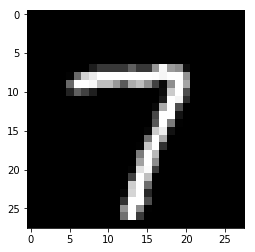

In [0]:
plt.imshow(mnist.train.images[100].reshape(28,28),cmap='gray')

In [0]:
single_img = mnist.train.images[100].reshape(28,28)
single_img.mean()

0.08267807

In [0]:
# placeholders

x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [0]:
weights_hidden1 = tf.Variable(tf.random_normal([784,500]))
bias_hidden1 = tf.Variable(tf.random_normal([500]))
# weights_hidden2 = tf.Variable(tf.random_normal([500,500]))
# bias_hidden2 = tf.Variable(tf.random_normal([500]))
# # weights_hidden3 = tf.Variable(tf.random_normal([500,500]))
# # bias_hidden3 = tf.Variable(tf.random_normal([500]))
output_layer_weight = tf.Variable(tf.random_normal([500,10]))
output_layer_bias = tf.Variable(tf.random_normal([10]))

In [0]:
l1 = tf.matmul(x,weights_hidden1)+bias_hidden1
l1 = tf.nn.relu(l1)
# l2 = tf.matmul(l1,weights_hidden2)+bias_hidden2
# l2 = tf.nn.relu(l2)
# l3 = tf.matmul(l2,weights_hidden3)+bias_hidden3
# l3 = tf.nn.relu(l3)


In [0]:
y = tf.matmul(l1,output_layer_weight) + output_layer_bias

In [0]:
crossenrtropy_loss_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.3)

In [0]:
train = optimiser.minimize(crossenrtropy_loss_fn)

In [0]:
init = tf.global_variables_initializer()

In [0]:
 saver = tf.train.Saver()

In [0]:
with tf.Session() as sess:

  sess.run(init)

  for step in range(1000):
    
    batch_x,batch_y = mnist.train.next_batch(300)

    sess.run(train,feed_dict={ x: batch_x ,y_true:batch_y})

  saver.save(sess,'model/mnist_result.h5')

  # eval

In [0]:
with tf.Session() as sess:

  saver.restore(sess,'model/mnist_result.h5')

  correct_pred = tf.equal(tf.argmax(y,1) ,tf.argmax(y_true,1))

  accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

  print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

INFO:tensorflow:Restoring parameters from model/mnist_result.h5
0.9412
